In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os; import sys
sys.path.append('/home/mitch/github/mfl/src/')
import utils
import sys; sys.path.append('/home/mitch/util/python')

In [41]:
raw     = '/home/mitch/Dropbox/data/mexico_fls/raw/2005/'
processed = '/home/mitch/Dropbox/data/mexico_fls/processed2/'

figs    = '/home/mitch/github/mfl/fig/'
dicts   = '/home/mitch/github/mfl/notebooks/dicts/'

In [42]:
df = pd.read_csv(processed + 'data.csv')
df

,hhid,hhmember,weight_ind,is_hhm,age,attended_school,education,gender,income_type,income_undetailed,...,hh_has_savings_batch,hh_has_savings_person_not_hhm,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings,weight
0,1000,1,2244.0,1.0,41.0,1.0,Medium,Male,dk,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1908.0
1,3000,1,2244.0,1.0,45.0,0.0,Low,Male,undetailed,6000.0,...,False,False,False,False,False,False,0.0,0.0,False,1908.0
2,8000,1,2244.0,1.0,33.0,1.0,High,Male,undetailed,60000.0,...,False,False,False,False,False,False,1.0,15000.0,True,1908.0
3,11000,1,2074.0,1.0,29.0,1.0,Medium,Male,detailed,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1763.0
4,12000,1,2074.0,1.0,46.0,1.0,Low,Male,undetailed,48000.0,...,False,False,False,False,False,False,0.0,0.0,True,1763.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3693,10751000,1,5539.0,1.0,39.0,1.0,Low,Male,undetailed,5000.0,...,False,False,False,False,False,False,1.0,12000.0,False,4119.0
3694,10752000,1,1614.0,1.0,32.0,1.0,Medium,Male,undetailed,60000.0,...,False,False,False,False,False,False,1.0,7000.0,False,1286.0
3695,10754000,1,817.0,1.0,43.0,1.0,Low,Male,undetailed,59000.0,...,False,False,False,False,False,False,1.0,1500.0,False,650.0
3696,10758000,1,839.0,1.0,27.0,1.0,Low,Male,undetailed,36000.0,...,False,False,False,False,False,False,0.0,0.0,False,668.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3698 entries, 0 to 3697
Data columns (total 96 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   hhid                               3698 non-null   int64  
 1   hhmember                           3698 non-null   int64  
 2   weight_ind                         3698 non-null   float64
 3   is_hhm                             3698 non-null   float64
 4   age                                3698 non-null   float64
 5   attended_school                    3697 non-null   float64
 6   education                          3698 non-null   object 
 7   gender                             3698 non-null   object 
 8   income_type                        2556 non-null   object 
 9   income_undetailed                  2039 non-null   float64
 10  has_income_second_job              3698 non-null   float64
 11  income_second_job                  52 non-null     float

In [44]:
df['education'] = pd.Categorical(df['education']).reorder_categories(['Low', 'Medium', 'High'])

In [45]:
df['income_decile'] = utils.get_deciles(df['income'], weights=df['weight'])
df['income_quartile'] = utils.get_quartiles(df['income'], weights=df['weight'])

## Financial Inclusion and Income
1. This section studies the relationship between financial inclusion and income 
2. I find that high income households are more likely to have access to financial markets than low income households

Text(0.5, 0, 'Income Decile')

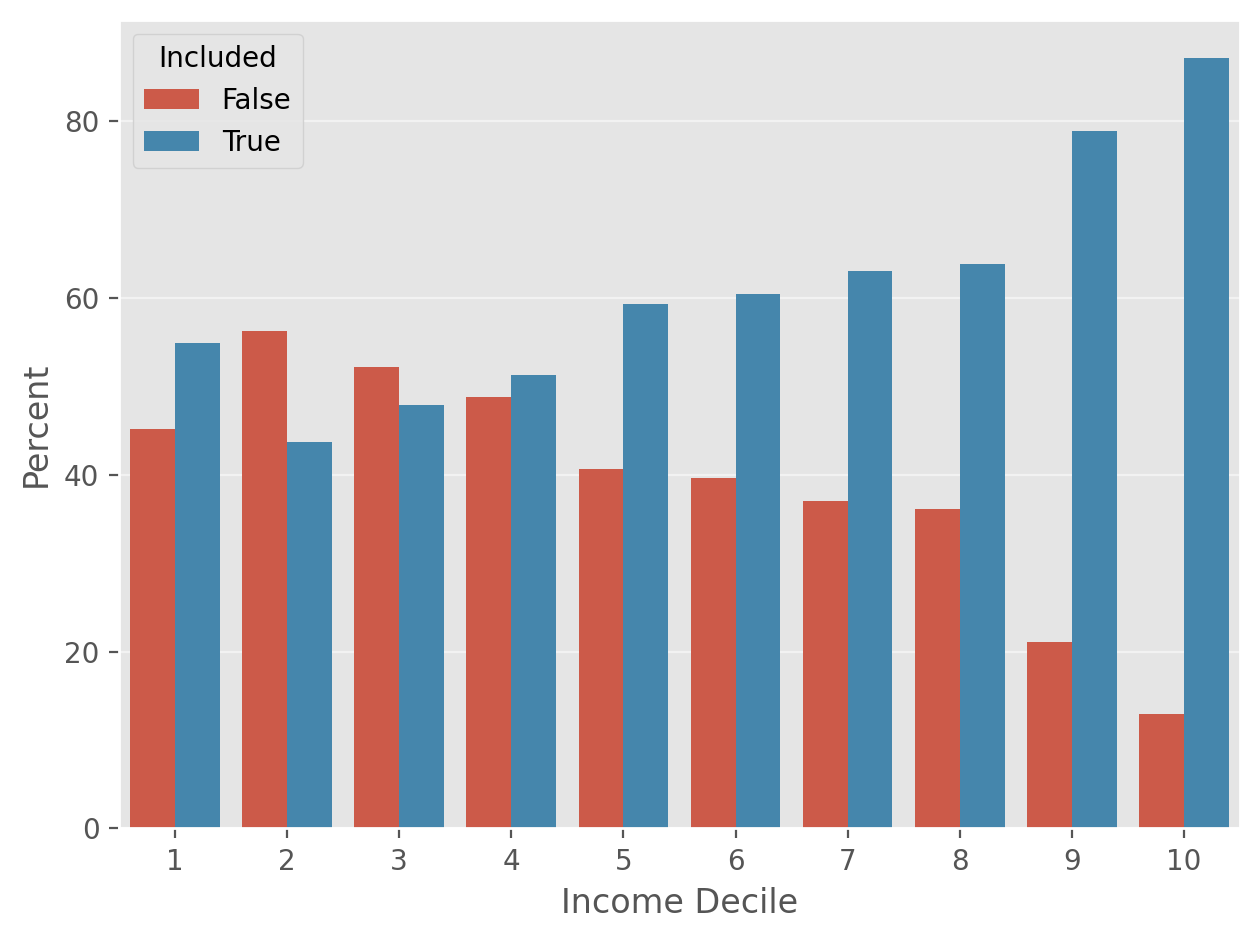

In [65]:
income_by_liquid = (100*pd.crosstab(df.income_decile, df.has_liquid, df.weight, aggfunc='sum', normalize='index')).reset_index()
income_by_liquid = income_by_liquid.melt(id_vars='income_decile', var_name='Included', value_name='Percent')

sns.barplot(income_by_liquid, x='income_decile', y='Percent', hue='Included')
plt.xlabel('Income Decile');

## Financial Inclusion and Education
- This section studies the relationship between financial inclusion and education
- I find that households with higher levels of education are more likely to be included 

Text(0.5, 0, 'Education')

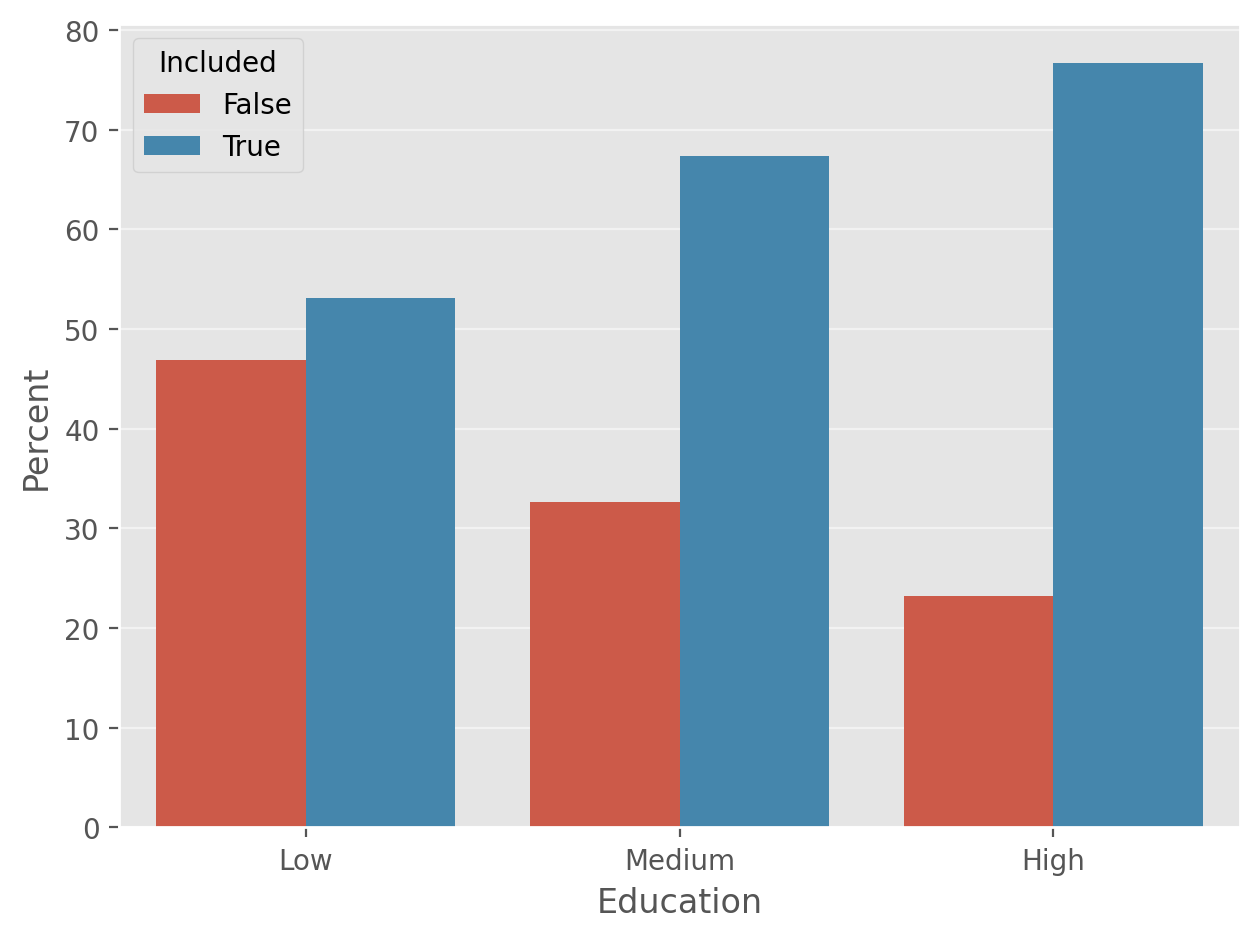

In [ ]:
education_by_liquid = (100*pd.crosstab(df.education, df.has_liquid, df.weight, aggfunc='sum', normalize='index')).reset_index()
education_by_liquid = education_by_liquid.melt(id_vars='education', var_name='Included', value_name='Percent')

sns.barplot(education_by_liquid, x='education', y='Percent', hue='Included')
plt.xlabel('Education')

## Financial Inclusion and Location
- This section studies the relationship between financial inclusion and location
- The level of location is that state (entidad) that a household resides in
- I find financial inclusion varies significantly across states
- Baja California Sur features the highest level of inclusion, whereas Nuevo Leon features the lowest level

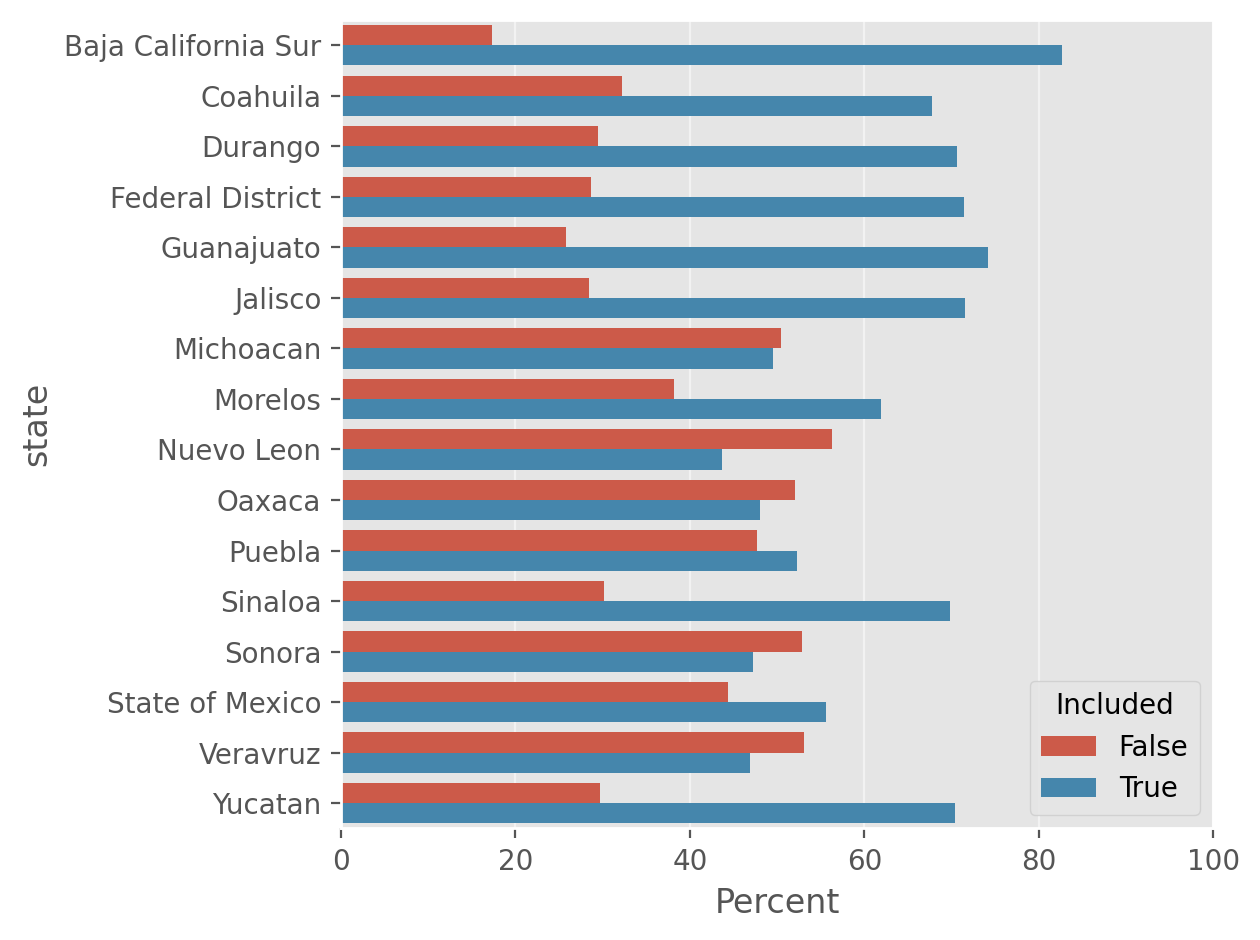

In [86]:
state_by_liquid = (100*pd.crosstab(df.state, df.has_liquid, df.weight, aggfunc='sum', normalize='index')).reset_index()
state_by_liquid = state_by_liquid.melt(id_vars='state', var_name='Included', value_name='Percent')
sns.barplot(state_by_liquid, x='Percent', y='state', hue='Included')
plt.ylabel('State')
plt.xlim(0, 100);

## Jobs and Financial Inclusion
- This section studies the relationship between financial inclusion and the job of the household head
- I find that financial inclusion varies significantly across industries
- Surprisingly, financial and insurance workers have one of the lowest levels of financial inclusion

In [89]:
naics_classification = (100*pd.crosstab(df.naics_classification, df.has_liquid, df.weight, aggfunc='sum', normalize='index')).reset_index()
naics_classification = naics_classification.sort_values(True, ascending=False)
naics_classification = naics_classification.melt(id_vars='naics_classification', var_name='Included', value_name='Percent')
naics_classification

,naics_classification,Included,Percent
0,Massive Means Information,False,19.371969
1,Government,False,22.762991
2,Utilities,False,22.864590
3,Mining,False,27.623362
4,Transportation,False,28.157472
5,Education,False,28.489272
6,Professional / Scientific,False,29.463423
7,Real Estate,False,31.703610
8,Wholesale,False,33.759046
9,Manufacturing,False,34.104848


(0.0, 100.0)

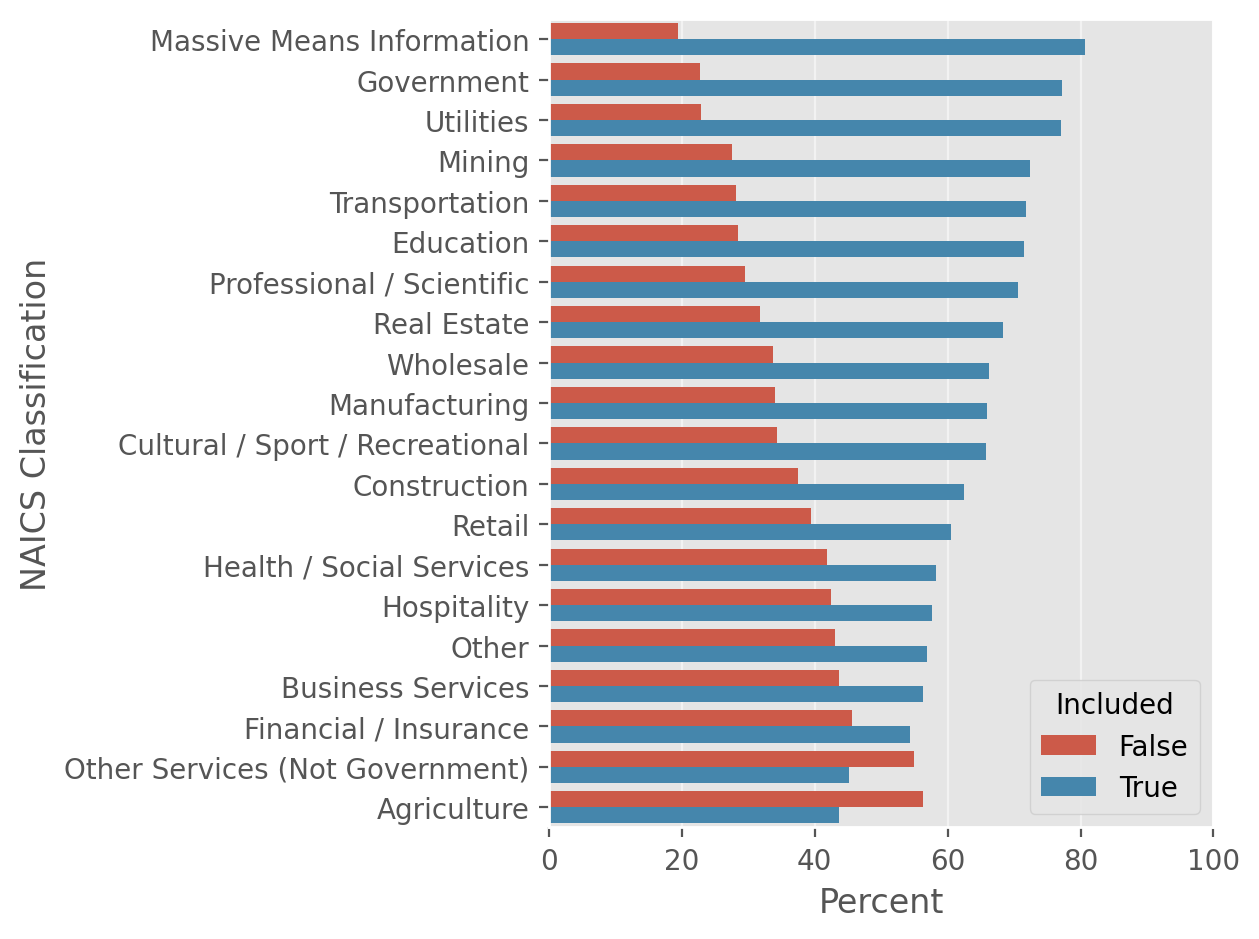

In [90]:
sns.barplot(naics_classification, x='Percent', y='naics_classification', hue='Included')
plt.ylabel('NAICS Classification')
plt.xlim(0, 100)

## Logsitic Regression
- This section studies financial inclusion using a logistic regression

In [103]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
df['has_liquid'] = df['has_liquid'].astype(int)

Y = 'has_liquid'
X = '~ C(income_decile) + C(education) + C(gender) + age + age_sq + C(state)'

logit = smf.glm(Y + X, df, freq_weights=df['weight']).fit()
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             has_liquid   No. Observations:                 3592
Model:                            GLM   Df Residuals:                 11414517
Model Family:                Gaussian   Df Model:                           29
Link Function:               Identity   Scale:                         0.21056
Method:                          IRLS   Log-Likelihood:            -7.3047e+06
Date:                Thu, 18 Jan 2024   Deviance:                   2.4034e+06
Time:                        16:00:49   Pearson chi2:                 2.40e+06
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0395      0.003     15.169      0.000       0.034       0.045
C(income_decile)[T.2]           -0.0476      0.001    -77.024      0.000      -0.049      -0.046
C(income_decile)[T.3]           -0.0067      0.001    -10.521      0.000      -0.008      -0.005
C(income_decile)[T.4]            0.0029      0.001      4.427      0.000       0.002       0.004
C(income_decile)[T.5]            0.0615      0.001    100.718      0.000       0.060       0.063
C(income_decile)[T.6]            0.0835      0.001    132.951      0.000       0.082       0.085
C(income_decile)[T.7]            0.0915      0.001    138.918      0.000       0.090       0.093
C(income_decile)[T.8]            0.0910      0.001    147.554      0.000       0.090       0.092
C(income_decile)[T.9]            0.2402      0.001    373.372      0.000       0.239       0.241
C(income_decile)[T.10]           0.3017      0.001    452.706      0.000       0.300       0.303
C(education)[T.Medium]           0.1113      0.000    333.367      0.000       0.111       0.112
C(education)[T.High]             0.0960      0.000    194.114      0.000       0.095       0.097
C(gender)[T.Male]                0.0565      0.000    164.084      0.000       0.056       0.057
C(state)[T.Coahuila]            -0.1241      0.001   -123.291      0.000      -0.126      -0.122
C(state)[T.Durango]             -0.0649      0.001    -58.648      0.000      -0.067      -0.063
C(state)[T.Federal District]    -0.1058      0.001   -104.142      0.000      -0.108      -0.104
C(state)[T.Guanajuato]           0.0097      0.001      9.556      0.000       0.008       0.012
C(state)[T.Jalisco]             -0.0759      0.001    -81.772      0.000      -0.078      -0.074
C(state)[T.Michoacan]           -0.2300      0.001   -237.203      0.000      -0.232      -0.228
C(state)[T.Morelos]             -0.1524      0.001   -159.679      0.000      -0.154      -0.151
C(state)[T.Nuevo Leon]          -0.3707      0.001   -370.111      0.000      -0.373      -0.369
C(state)[T.Oaxaca]              -0.2772      0.001   -273.799      0.000      -0.279      -0.275
C(state)[T.Puebla]              -0.2183      0.001   -223.428      0.000      -0.220      -0.216
C(state)[T.Sinaloa]             -0.0811      0.001    -73.918      0.000      -0.083      -0.079
C(state)[T.Sonora]              -0.2835      0.001   -252.013      0.000      -0.286      -0.281
C(state)[T.State of Mexico]     -0.1865      0.001   -201.626      0.000      -0.188      -0.185
C(state)[T.Veravruz]            -0.2396      0.001   -259.587      0.000      -0.241      -0.238
C(state)[T.Yucatan]             -0.0456      0.001    -44.488      0.000      -0.048      -0.044
age                              0.0224      0.000    207.253      0.000    